# Capstone Projoect: Maternal Health

## Maternal Sepsis by Select Risk Factors

Source: https://healthdata.gov/State/Maternal-Sepsis-by-Select-Risk-Factors-SPARCS-2016/gy4j-ef7j

Additional Information: https://health.data.ny.gov/Health/Maternal-Sepsis-by-Select-Risk-Factors-SPARCS-2016/p9ay-x62y

## Questions:

- What are the 10 most risk factors to get a sepsis during the maternal window?
        
        

## Imports

In [114]:
import numpy as np
import pandas as pd
import requests

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [115]:
#Set options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)  

base_color = sns.color_palette('pastel')[0]


def beschriftung_diagramm(x_label,y_label,title):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

## Load the data

In [116]:
df = pd.read_csv('Maternal_Sepsis_by_Select_Risk_Factors__SPARCS__2016-2018.csv')
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')



C:\Users\Laura Hagg\AppData\Local\Temp\ipykernel_9764\497457483.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')
C:\Users\Laura Hagg\AppData\Local\Temp\ipykernel_9764\497457483.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace(',', '')


In [117]:
df.head(10)

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
0,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Alcohol abuse,No,638839,99.82,532,83.28,ref,NaN,124,19.41,ref,NaN
1,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Alcohol abuse,Yes,1184,0.18,5,422.30,5.09 (2.11-12.30),0.0003,1,84.46,4.36 (0.61-31.18),0.1426
2,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Asthma,No,596372,93.18,449,75.29,ref,NaN,101,16.94,ref,NaN
3,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Asthma,Yes,43651,6.82,88,201.60,2.68 (2.13-3.37),<.0001,24,54.98,3.25 (2.08-5.07),<.0001
4,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Cardiac valvular disease,No,637840,99.66,527,82.62,ref,NaN,124,19.44,ref,NaN
5,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Cardiac valvular disease,Yes,2183,0.34,10,458.09,5.57 (2.97-10.42),<.0001,1,45.81,2.36 (0.33-16.87),0.3932
6,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Chronic congestive heart failure,No,639881,99.98,535,83.61,ref,NaN,124,19.38,ref,NaN
7,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Chronic congestive heart failure,Yes,142,0.02,2,1408.45,17.09 (4.23-69.15),<.0001,1,704.23,36.67 (5.10-263.7),0.0003
8,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Chronic ischemic heart disease,No,639637,99.94,535,83.64,ref,NaN,123,19.23,ref,NaN
9,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Chronic ischemic heart disease,Yes,386,0.06,2,518.13,6.22 (1.55-25.03),0.0101,2,518.13,27.08 (6.67-109.9),<.0001


In [118]:
df.tail(10)

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
575,2016-2018,Postpartum,SPARCS,Obstetric,Sickle cell disease with crisis,No,640008,100.00,758,118.44,ref,NaN,121,18.91,ref,NaN
576,2016-2018,Postpartum,SPARCS,Obstetric,Sickle cell disease with crisis,Yes,15,0.00,0,0.00,0.00 (<0.001->999.99),0.9682,0,0.00,0.00 (<0.001->999.99),0.9873
577,2016-2018,Postpartum,SPARCS,Obstetric,Stillbirth,No,639508,99.92,757,118.37,ref,NaN,121,18.92,ref,NaN
578,2016-2018,Postpartum,SPARCS,Obstetric,Stillbirth,Yes,515,0.08,1,194.17,1.64 (0.23-11.69),0.6206,0,0.00,<0.001 (<0.001->999.99),0.9832
579,2016-2018,Postpartum,SPARCS,Obstetric,Temporary tracheostomy,No,639667,99.94,748,116.94,ref,NaN,114,17.82,ref,NaN
580,2016-2018,Postpartum,SPARCS,Obstetric,Temporary tracheostomy,Yes,356,0.06,10,2808.99,24.69 (13.11-46.49),<.0001,7,1966.29,112.5 (52.08-243.1),<.0001
581,2016-2018,Postpartum,Birth certificate,Obstetric,Uterine rupture,No,618947,99.97,756,122.14,ref,NaN,121,19.55,ref,NaN
582,2016-2018,Postpartum,Birth certificate,Obstetric,Uterine rupture,Yes,195,0.03,1,512.82,4.22 (0.59-30.11),0.1513,0,0.00,<0.001 (<0.001->999.99),0.9844
583,2016-2018,Postpartum,SPARCS,Obstetric,Ventilation,No,639668,99.94,748,116.94,ref,NaN,114,17.82,ref,NaN
584,2016-2018,Postpartum,SPARCS,Obstetric,Ventilation,Yes,355,0.06,10,2816.90,24.76 (13.15-46.62),<.0001,7,1971.83,112.9 (52.23-243.8),<.0001


In [119]:
df.columns.tolist()

['Years_of_Live_Birth',
 'Maternal_Window',
 'Data_Source',
 'Risk_Factor_Type',
 'Risk_Factor',
 'Risk_Factor_Strata',
 'Live_Births_N',
 'Live_Births_%',
 'Any_Sepsis_Incidence_N',
 'Any_Sepsis_Incidence_per_100000_Live_Births',
 'Any_Sepsis_Crude_Odds_Ratio_95%_CI',
 'Any_Sepsis_p-value',
 'Severe_Sepsis_Incidence_N',
 'Severe_Sepsis_Incidence_per_100000_Live_Births',
 'Severe_Sepsis_Crude_Odds_Ratio_95%_CI',
 'Severe_Sepsis_p-value']

In [120]:
#json Datei laden

url = 'https://health.data.ny.gov/api/views/p9ay-x62y/columns.json'
response = requests.get(url)
data = response.json()
df_app = pd.DataFrame(data)
df_app.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
id,546924826,546924825,546924824,546924823,546924822,546924821,546924836,546924835,546924834,546924833,546924832,546924831,546924830,546924829,546924828,546924827
name,Year(s) of Live Birth,Maternal Window,Data Source,Risk Factor Type,Risk Factor,Risk Factor Strata,Live Births (N),Live Births (%),Any Sepsis Incidence (N),"Any Sepsis Incidence per 100,000 Live Births",Any Sepsis Crude Odds Ratio (95% CI),Any Sepsis p-value,Severe Sepsis Incidence (N),"Severe Sepsis Incidence per 100,000 Live Births",Severe Sepsis Crude Odds Ratio (95% CI),Severe Sepsis p-value
dataTypeName,text,text,text,text,text,text,number,number,number,number,text,text,number,number,text,text
description,The years during which the live births represented in the data occurred.,"The period in which sepsis was identified: pregnancy, delivery, or postpartum (within 42 days after delivery).",The data source used to identify the risk factor represented by the data within the row: SPARCS (defined using ICD10 diagnoses) and/or birth certificate,"The general type of risk factor represented by the data within the row and the coding definition used, where applicable (e.g., Bateman1 comorbidities, Elixhauser2 comorbidities).",The specific risk factor characteristic represented by the data within the row.,The strata of the risk factor characteristic represented by the data within the row.,The number of eligible live births events identified within the specified risk factorstrata.,The percentage of eligible live births events within the specified risk factor strata.,The number of maternal sepsis events (including septicemia as well as severe sepsis/septic shock) identified via diagnosis coding during the specified maternal window among eligible live births within the specified risk factorstrata.,"The rate of maternal sepsis events (including septicemia as well as severe sepsis/septic shock) identified via diagnosis coding during the specified maternal window and risk factor strata per 100,000 eligible live births.","The unadjusted odds ratio from a logistic regression model predicting any sepsis (including septicemia as well as severe sepsis/septic shock) during the specified maternal window for the specified risk factor strata relative to the reference group, followed by the 95% confidence interval (lower bound-upper bound) for the odds ratio. The reference group for each risk factor is noted as “ref”.",The p-value from the logistic regression model predicting any sepsis (including septicemia as well assevere sepsis/septic shock) during the specified maternal window for the specified risk factor strata. Values below .05 indicate a statistically significant association.,The number of maternal severe sepsis/septic shock events identified via diagnosis coding during the specified maternal window among eligible live births within the specified risk factor strata.,"The rate of maternal severe sepsis/septic shock events identified via diagnosis coding at any point within the specified maternal window and risk factor strata per 100,000 eligible live births.","The unadjusted odds ratio from a logistic regression model predicting severe sepsis/septic shock during the specified maternal window for the specified risk factor strata relative to the reference group, followed by the 95% confidence interval (lower bound-upper bound) for the odds ratio. The reference group for each risk factoris noted as “ref”.",The p-value from the logistic regression model predicting severe sepsis/septic shock during the specified maternal window for the specified risk factor strata. Values below .05 indicate a statistically significant association.
fieldName,year_s_of_live_birth,maternal_window,data_source,risk_factor_type,risk_factor,risk_factor_strata,live_births_n,live_births,any_sepsis_incidence_n,any_sepsis_incidence_per,any_sepsis_crude_odds_ratio,any_sepsis_p_value,severe_sepsis_incidence_n,severe_sepsis_incidence_per,severe_sepsis_crude_odds,severe_sepsi

In [121]:
#content of the column description
df_app[['name', 'description']]

,name,description
0,Year(s) of Live Birth,The years during which the live births represented in the data occurred.
1,Maternal Window,"The period in which sepsis was identified: pregnancy, delivery, or postpartum (within 42 days after delivery)."
2,Data Source,The data source used to identify the risk factor represented by the data within the row: SPARCS (defined using ICD10 diagnoses) and/or birth certificate
3,Risk Factor Type,"The general type of risk factor represented by the data within the row and the coding definition used, where applicable (e.g., Bateman1 comorbidities, Elixhauser2 comorbidities)."
4,Risk Factor,The specific risk factor characteristic represented by the data within the row.
5,Risk Factor Strata,The strata of the risk factor characteristic represented by the data within the row.
6,Live Births (N),The number of eligible live births events identified within the specified risk factorstrata.
7,Live Births (%),The percentage of eligible live births events within the specified risk factor strata.
8,Any Sepsis Incidence (N),The number of maternal sepsis events (including septicemia as well as severe sepsis/septic shock) identified via diagnosis coding during the specified maternal window among eligible live births within the specified risk factorstrata.
9,"Any Sepsis Incidence per 100,000 Live Births","The rate of maternal sepsis events (including septicemia as well as severe sepsis/septic shock) identified via diagnosis coding during the specified maternal window and risk factor strata per 100,000 eligible live births."


## Cleaning

### Change datatypes

In [122]:
#Change the datatype of the p-value (any sepsis and severe sepsis) to a float
df['Any_Sepsis_p-value'] = df['Any_Sepsis_p-value'].str.replace('<.0001', '0.0001').astype(float)
df['Severe_Sepsis_p-value'] = df['Severe_Sepsis_p-value'].str.replace('<.0001', '0.0001').astype(float)



C:\Users\Laura Hagg\AppData\Local\Temp\ipykernel_9764\340680102.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Any_Sepsis_p-value'] = df['Any_Sepsis_p-value'].str.replace('<.0001', '0.0001').astype(float)
C:\Users\Laura Hagg\AppData\Local\Temp\ipykernel_9764\340680102.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Severe_Sepsis_p-value'] = df['Severe_Sepsis_p-value'].str.replace('<.0001', '0.0001').astype(float)


### Tabacco use = Tabacco Use
### Alcohol use  = Alcohol abusus

In [123]:
df[df['Risk_Factor'] == 'Tobacco Use']

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
106,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Tobacco Use,No,576262,93.07,466,80.87,ref,NaN,113,19.61,ref,NaN
107,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Tobacco Use,Yes,42128,6.80,52,123.43,1.53 (1.15-2.03),0.0038,9,21.36,1.09 (0.55-2.15),0.8046
108,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Tobacco Use,Unknown,752,0.12,2,265.96,3.30 (0.82-13.25),0.0921,0,0.00,<0.001 (<0.001->999.99),0.9793
253,2016-2018,Delivery,Birth certificate,Other Comorbidities,Tobacco Use,No,576262,93.07,572,99.26,ref,NaN,104,18.05,ref,NaN
254,2016-2018,Delivery,Birth certificate,Other Comorbidities,Tobacco Use,Yes,42128,6.80,48,113.94,1.15 (0.86-1.54),0.3585,14,33.23,1.84 (1.05-3.22),0.0320
255,2016-2018,Delivery,Birth certificate,Other Comorbidities,Tobacco Use,Unknown,752,0.12,7,930.85,9.46 (4.48-20.00),0.0001,4,531.91,29.63 (10.89-80.63),0.0001
472,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Tobacco Use,No,576262,93.07,686,119.04,ref,NaN,109,18.92,ref,NaN
473,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Tobacco Use,Yes,42128,6.80,70,166.16,1.40 (1.09-1.79),0.0078,12,28.48,1.51 (0.83-2.73),0.1782
474,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Tobacco Use,Unknown,752,0.12,1,132.98,1.12 (0.16-7.95),0.9119,0,0.00,<0.001 (<0.001->999.99),0.9795


In [124]:
df[df['Risk_Factor'] == 'Tobacco use']

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
46,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Tobacco use,No,608267,95.04,466,76.61,ref,NaN,116,19.07,ref,NaN
47,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Tobacco use,Yes,31756,4.96,71,223.58,2.92 (2.28-3.75),0.0001,9,28.34,1.49 (0.75-2.93),0.2522
193,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Tobacco use,No,608267,95.04,618,101.60,ref,NaN,121,19.89,ref,NaN
194,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Tobacco use,Yes,31756,4.96,52,163.75,1.61 (1.21-2.14),0.0009,13,40.94,2.06 (1.16-3.65),0.0133
412,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Tobacco use,No,608267,95.04,697,114.59,ref,NaN,113,18.58,ref,NaN
413,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Tobacco use,Yes,31756,4.96,61,192.09,1.68 (1.29-2.18),0.0001,8,25.19,1.36 (0.66-2.78),0.4033


In [125]:
df[df['Risk_Factor'] == 'Alcohol Use']

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
92,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Alcohol Use,No,612201,98.88,512,83.63,ref,NaN,122,19.93,ref,NaN
93,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Alcohol Use,Yes,5455,0.88,6,109.99,1.32 (0.59-2.94),0.5045,0,0.00,<0.001 (<0.001->999.99),0.9754
94,2016-2018,Pregnancy,Birth certificate,Other Comorbidities,Alcohol Use,Unknown,1486,0.24,2,134.59,1.61 (0.40-6.46),0.5017,0,0.00,<0.001 (<0.001->999.99),0.9871
239,2016-2018,Delivery,Birth certificate,Other Comorbidities,Alcohol Use,No,612201,98.88,613,100.13,ref,NaN,117,19.11,ref,NaN
240,2016-2018,Delivery,Birth certificate,Other Comorbidities,Alcohol Use,Yes,5455,0.88,5,91.66,0.92 (0.38-2.21),0.8439,2,36.66,1.92 (0.47-7.77),0.3609
241,2016-2018,Delivery,Birth certificate,Other Comorbidities,Alcohol Use,Unknown,1486,0.24,9,605.65,6.08 (3.14-11.76),0.0001,3,201.88,10.58 (3.36-33.33),0.0001
458,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Alcohol Use,No,612201,98.88,752,122.84,ref,NaN,120,19.60,ref,NaN
459,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Alcohol Use,Yes,5455,0.88,5,91.66,0.75 (0.31-1.80),0.5138,1,18.33,0.94 (0.13-6.69),0.9468
460,2016-2018,Postpartum,Birth certificate,Other Comorbidities,Alcohol Use,Unknown,1486,0.24,0,0.00,<0.001 (<0.001->999.99),0.9517,0,0.00,<0.001 (<0.001->999.99),0.9807


In [126]:
df[df['Risk_Factor'] == 'Alcohol abuse']

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
0,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Alcohol abuse,No,638839,99.82,532,83.28,ref,NaN,124,19.41,ref,NaN
1,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Alcohol abuse,Yes,1184,0.18,5,422.30,5.09 (2.11-12.30),0.0003,1,84.46,4.36 (0.61-31.18),0.1426
147,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Alcohol abuse,No,638839,99.82,668,104.56,ref,NaN,132,20.66,ref,NaN
148,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Alcohol abuse,Yes,1184,0.18,2,168.92,1.62 (0.40-6.48),0.4980,2,168.92,8.19 (2.02-33.12),0.0032
366,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Alcohol abuse,No,638839,99.82,757,118.50,ref,NaN,121,18.94,ref,NaN
367,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Alcohol abuse,Yes,1184,0.18,1,84.46,0.71 (0.10-5.07),0.7357,0,0.00,<0.001 (<0.001->999.99),0.9746


In [127]:
df_clean = df[~df['Risk_Factor'].isin(['Alcohol Use', 'Tobacco Use'])]

In the dataframe there are two riskfactors twice: 
- Taoacco use (& Tobacco Use)
- Alcohol use (& Alcohol abuse)

The reason is, that the data is from two data sources: SPARCS and Birth Certificate. 

I have three options:
1. Let the data as it is.
2. Count the data togheter.
3. Remove one of the risk factors.

So I decided to remove one of these risk factors, so they are not twice in the data analysis. I will remove these risk factors from the data source 'Birth certificate', because the risk factor stata is devided into three parts: yes, no and unknown. Most of the other risk factors have only two options: yes and no. So for the further analysis is will be easier to explore the alcohol and tobacco use from the SPARCS source.

## Prepare Dataframes for Analysis

In [128]:
risk_yes = df_clean[df_clean['Risk_Factor_Strata'] == 'Yes']

risk_no = df_clean[df_clean['Risk_Factor_Strata'] == 'No']



## Analysis

In [129]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 567 entries, 0 to 584
Data columns (total 16 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Years_of_Live_Birth                             567 non-null    object 
 1   Maternal_Window                                 567 non-null    object 
 2   Data_Source                                     567 non-null    object 
 3   Risk_Factor_Type                                567 non-null    object 
 4   Risk_Factor                                     567 non-null    object 
 5   Risk_Factor_Strata                              567 non-null    object 
 6   Live_Births_N                                   567 non-null    int64  
 7   Live_Births_%                                   567 non-null    float64
 8   Any_Sepsis_Incidence_N                          567 non-null    int64  
 9   Any_Sepsis_Incidence_per_100000_Live_Births

In [130]:
#unique values for some columns
columns = ['Years_of_Live_Birth',
 'Maternal_Window',
 'Data_Source',
 'Risk_Factor_Type',
 'Risk_Factor',
 'Risk_Factor_Strata']
for column in columns:
    print(df[column].unique())


['2016-2018']
['Pregnancy' 'Delivery' 'Postpartum']
['SPARCS' 'Birth certificate' 'SPARCS & Birth certificate']
['Bateman Comorbidities' 'Elixhauser Comorbidities' 'Other Comorbidities'
 'Demographics' 'Obstetric']
['Alcohol abuse' 'Asthma' 'Cardiac valvular disease'
 'Chronic congestive heart failure' 'Chronic ischemic heart disease'
 'Chronic renal disease' 'Congenital heart disease' 'Cystic fibrosis'
 'Drug abuse' 'Gestational diabetes mellitus' 'Gestational hypertension'
 'Human immunodeficiency virus'
 'Mild preeclampsia or unspecified preeclampsia' 'Multiple gestation'
 'Obesity' 'Placenta previa' 'Preexisting diabetes mellitus'
 'Preexisting hypertension' 'Previous cesarean delivery'
 'Pulmonary hypertension' 'Severe preeclampsia/eclampsia'
 'Sickle cell disease' 'Systemic lupus erythematosus' 'Tobacco use'
 'Blood loss anaemia' 'Cardiac arrhythmias' 'Chronic pulmonary disease'
 'Coagulopathy' 'Deficiency anaemia' 'Depression'
 'Fluid and electrolyte disorders' 'Hypothyroidism' 

In [131]:
df.describe()

,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_p-value
count,585.000000,585.000000,585.000000,585.000000,332.000000,585.000000,585.000000,332.000000
mean,275475.593162,43.214325,289.001709,513.954940,0.222433,54.536752,246.649624,0.378948
std,290965.118214,45.618133,299.848109,1835.442843,0.347062,54.855905,1284.275285,0.418585
min,1.000000,0.000000,0.000000,0.000000,0.000100,0.000000,0.000000,0.000100
25%,2826.000000,0.440000,11.000000,94.950000,0.000100,3.000000,18.110000,0.001550
50%,89369.000000,13.960000,109.000000,117.270000,0.004700,24.000000,19.570000,0.134500
75%,627420.000000,98.240000,618.000000,199.090000,0.365125,119.000000,35.110000,0.935175
max,640022.000000,100.000000,758.000000,17280.450000,0.986300,134.000000,16666.670000,0.994000


### Number of Births

In [132]:
df_clean['Live_Births_N'].sum()

157438370

### Data Source

In [133]:
df_clean['Data_Source'].value_counts()

SPARCS                        453
Birth certificate              60
SPARCS & Birth certificate     54
Name: Data_Source, dtype: int64

### Maternal Window

In [134]:
df_clean['Maternal_Window'].value_counts()

Delivery      213
Postpartum    213
Pregnancy     141
Name: Maternal_Window, dtype: int64

In [137]:
df.groupby('Maternal_Window')['Any_Sepsis_Incidence_per_100000_Live_Births'].mean()

Maternal_Window
Delivery      941.130411
Postpartum    275.152557
Pregnancy     233.317483
Name: Any_Sepsis_Incidence_per_100000_Live_Births, dtype: float64

In [138]:
df.groupby('Maternal_Window')['Live_Births_%'].mean()

Maternal_Window
Delivery      43.805753
Postpartum    43.805753
Pregnancy     41.452109
Name: Live_Births_%, dtype: float64

### Risk Factor Type

In [139]:
df_clean['Risk_Factor_Type'].value_counts()

Obstetric                   180
Bateman Comorbidities       144
Elixhauser Comorbidities    132
Demographics                 78
Other Comorbidities          33
Name: Risk_Factor_Type, dtype: int64

In [140]:
df.groupby('Risk_Factor_Type')['Any_Sepsis_Incidence_per_100000_Live_Births'].mean()

Risk_Factor_Type
Bateman Comorbidities        267.136111
Demographics                 117.084231
Elixhauser Comorbidities     291.990985
Obstetric                   1124.367167
Other Comorbidities          237.932745
Name: Any_Sepsis_Incidence_per_100000_Live_Births, dtype: float64

In [141]:
df.groupby('Risk_Factor_Type')['Live_Births_%'].mean()

Risk_Factor_Type
Bateman Comorbidities       50.000000
Demographics                15.258846
Elixhauser Comorbidities    50.000000
Obstetric                   45.501222
Other Comorbidities         41.175882
Name: Live_Births_%, dtype: float64

### Risk Factor Strata

In [142]:
df_clean['Risk_Factor_Strata'].value_counts()

No                                             232
Yes                                            232
Unknown                                         19
Multi-Racial, Non-Hispanic                       3
2nd                                              3
1st                                              3
No NYS County                                    3
Western                                          3
Utica-Adirondack                                 3
Northern Metro                                   3
Northeast                                        3
New York City                                    3
Mid-Hudson                                       3
Long Island                                      3
Finger Lakes                                     3
Central                                          3
Asian/Pacific Islander, Non-Hispanic             3
Other, Non-Hispanic                              3
Native American/Alaska Native, Non-Hispanic      3
Hispanic                       

### Risk Factor

In [143]:
df_clean['Risk_Factor'].value_counts()

Region of Residence                                         30
Race/Ethnicity                                              21
Education                                                   18
Trimester Beginning Prenatal Care                           12
Nulliparity                                                  9
Multiple Gestation                                           9
Illegal Drug Use                                             9
Age Group                                                    9
Peptic ulcer disease, excluding bleeding                     6
Pulmonary circulation disorders                              6
Psychoses                                                    6
Peripheral vascular disorders                                6
Alcohol abuse                                                6
Paralysis                                                    6
Rheumatoid arthritis/collagen vascular diseases              6
Other neurological disorders                           

In [144]:
set(df_clean['Risk_Factor'].tolist())

{'3rd or 4th degree tears',
 'ART',
 'Abnormal placentation',
 'Acute myocardial infarction',
 'Acute renal failure',
 'Adult respiratory distress syndrome',
 'Age Group',
 'Air and thrombotic embolism',
 'Alcohol abuse',
 'Amniotic fluid embolism',
 'Aneurysm',
 'Asthma',
 'Blood loss anaemia',
 'Blood products transfusion',
 'Cardiac arrest/ventricular fibrillation',
 'Cardiac arrhythmias',
 'Cardiac valvular disease',
 'Cerclage (rescue>prophylactic)',
 'Cesarean Delivery',
 'Chronic congestive heart failure',
 'Chronic ischemic heart disease',
 'Chronic pulmonary disease',
 'Chronic renal disease',
 'Coagulopathy',
 'Congenital heart disease',
 'Conversion of cardiac rhythm',
 'Cystic fibrosis',
 'Deficiency anaemia',
 'Depression',
 'Disseminated intravascular coagulation',
 'Drug abuse',
 'Eclampsia',
 'Education',
 'Episiotomy',
 'Fluid and electrolyte disorders',
 'Gestational diabetes mellitus',
 'Gestational hypertension',
 'Group B Strep Carrier',
 'Heart failure/arrest duri

In [145]:
risk_factors = sorted(set(df_clean['Risk_Factor'].tolist()))

for risk in risk_factors:
    df_filtered = df_clean[(df_clean['Risk_Factor'] == risk) & (df_clean['Maternal_Window'] == 'Delivery')]
    df_sum = df_filtered['Live_Births_N'].sum()
    print(f"Sum for Risk Factor '{risk}': {df_sum}")


    

Sum for Risk Factor '3rd or 4th degree tears': 619142
Sum for Risk Factor 'ART': 619142
Sum for Risk Factor 'Abnormal placentation': 640023
Sum for Risk Factor 'Acute myocardial infarction': 640023
Sum for Risk Factor 'Acute renal failure': 640023
Sum for Risk Factor 'Adult respiratory distress syndrome': 640023
Sum for Risk Factor 'Age Group': 640023
Sum for Risk Factor 'Air and thrombotic embolism': 640023
Sum for Risk Factor 'Alcohol abuse': 640023
Sum for Risk Factor 'Amniotic fluid embolism': 640023
Sum for Risk Factor 'Aneurysm': 640023
Sum for Risk Factor 'Asthma': 640023
Sum for Risk Factor 'Blood loss anaemia': 640023
Sum for Risk Factor 'Blood products transfusion': 640023
Sum for Risk Factor 'Cardiac arrest/ventricular fibrillation': 640023
Sum for Risk Factor 'Cardiac arrhythmias': 640023
Sum for Risk Factor 'Cardiac valvular disease': 640023
Sum for Risk Factor 'Cerclage (rescue>prophylactic)': 619142
Sum for Risk Factor 'Cesarean Delivery': 619142
Sum for Risk Factor 'Chr

In [187]:
#for the risk-yes dataframe
risk_factors = set(risk_yes['Risk_Factor'].tolist())

for risk in risk_factors:
    risk_yes_filtered = risk_yes[(risk_yes['Risk_Factor'] == risk) & (risk_yes['Maternal_Window'] == 'Delivery')]
    risk_yes_number = risk_yes_filtered['Live_Births_N'].values[0]
    print(f"Sum for Risk Factor '{risk}': {risk_yes_number}")



Sum for Risk Factor 'Premature rupture of membranes': 71846
Sum for Risk Factor 'Abnormal placentation': 980
Sum for Risk Factor 'Illegal Drug Use': 14992
Sum for Risk Factor 'Acute renal failure': 508
Sum for Risk Factor 'Cesarean Delivery': 209421
Sum for Risk Factor 'Peripheral vascular disorders': 273
Sum for Risk Factor 'Operative Vaginal Delivery': 19910
Sum for Risk Factor 'Nulliparity': 188819
Sum for Risk Factor 'Conversion of cardiac rhythm': 63
Sum for Risk Factor 'Cardiac arrest/ventricular fibrillation': 39
Sum for Risk Factor 'Severe anesthesia complications': 37
Sum for Risk Factor 'Other Immunosupression': 689
Sum for Risk Factor 'Amniotic fluid embolism': 22
Sum for Risk Factor 'Valvular disease': 2362
Sum for Risk Factor 'Sickle cell disease': 10948
Sum for Risk Factor 'Retained Products of Conception': 958
Sum for Risk Factor 'History of Sepsis (w/in 1yr prior to start of pregnancy)': 587
Sum for Risk Factor 'Peptic ulcer disease, excluding bleeding': 241
Sum for Ris

### Top ten risk factors. Independent if there is a sepsis or not

In [189]:


risk_factors = set(risk_yes['Risk_Factor'].tolist())
sum_data = []

for risk in risk_factors:
    risk_yes_filtered = risk_yes[(risk_yes['Risk_Factor'] == risk) & (risk_yes['Maternal_Window'] == 'Delivery')]
    risk_yes_sum = risk_yes_filtered['Live_Births_N'].values[0]
    sum_data.append({'Risk_Factor': risk, 'Live_Births_N': risk_yes_sum})

risk_yes_sum = pd.DataFrame(sum_data)

top_10_risk_factors = risk_yes_sum.sort_values(by='Live_Births_N', ascending=False).head(10)
top_10_risk_factors = top_10_risk_factors.reset_index(drop=True)
top_10_risk_factors

,Risk_Factor,Live_Births_N
0,Induction of Labor,243920
1,Cesarean Delivery,209421
2,Nulliparity,188819
3,Group B Strep Carrier,127776
4,Previous cesarean delivery,115630
5,Obesity,90289
6,Blood loss anaemia,77802
7,Premature rupture of membranes,71846
8,Gestational diabetes mellitus,56628
9,Episiotomy,53120


In [148]:
list_risk = top_10_risk_factors['Risk_Factor'].tolist()
list_risk

['Induction of Labor',
 'Cesarean Delivery',
 'Nulliparity',
 'Group B Strep Carrier',
 'Previous cesarean delivery',
 'Obesity',
 'Blood loss anaemia',
 'Premature rupture of membranes',
 'Gestational diabetes mellitus',
 'Episiotomy']

In [205]:
#check if the top 10 risk factors have a significant p-value for  any sepsis
list_risk = top_10_risk_factors['Risk_Factor'].tolist()
df_top_10  = risk_yes[risk_yes['Risk_Factor'].isin(list_risk)]
df_top_10_any = df_top_10[df_top_10['Any_Sepsis_p-value'] < 0.05]
df_top_10_any 

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
29,2016-2018,Pregnancy,SPARCS,Bateman Comorbidities,Obesity,Yes,90289,14.11,100,110.76,1.39 (1.12-1.73),0.0028,13,14.40,0.71 (0.40-1.26),0.2371
49,2016-2018,Pregnancy,SPARCS,Elixhauser Comorbidities,Blood loss anaemia,Yes,77802,12.16,241,309.76,5.90 (4.98-6.99),0.0001,72,92.54,9.83 (6.89-14.01),0.0001
166,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Gestational diabetes mellitus,Yes,56628,8.85,86,151.87,1.52 (1.21-1.90),0.0003,13,22.96,1.11 (0.62-1.96),0.7279
176,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Obesity,Yes,90289,14.11,172,190.50,2.11 (1.77-2.50),0.0001,29,32.12,1.68 (1.11-2.54),0.0132
196,2016-2018,Delivery,SPARCS,Elixhauser Comorbidities,Blood loss anaemia,Yes,77802,12.16,158,203.08,2.23 (1.87-2.67),0.0001,36,46.27,2.66 (1.81-3.89),0.0001
243,2016-2018,Delivery,SPARCS,Other Comorbidities,Group B Strep Carrier,Yes,127776,19.96,107,83.74,0.76 (0.62-0.94),0.0100,19,14.87,0.66 (0.41-1.08),0.0962
307,2016-2018,Delivery,SPARCS & Birth certificate,Obstetric,Cesarean Delivery,Yes,209421,33.82,437,208.67,4.51 (3.80-5.34),0.0001,86,41.07,4.67 (3.17-6.90),0.0001
316,2016-2018,Delivery,SPARCS & Birth certificate,Obstetric,Episiotomy,Yes,53120,8.58,36,67.77,0.65 (0.46-0.91),0.0118,3,5.65,0.27 (0.09-0.84),0.0245
327,2016-2018,Delivery,Birth certificate,Obstetric,Nulliparity,Yes,188819,30.50,260,137.70,1.62 (1.38-1.90),0.0001,39,20.65,1.07 (0.73-1.56),0.7394
337,2016-2018,Delivery,SPARCS,Obstetric,Premature rupture of membranes,Yes,71846,11.23,110,153.11,1.55 (1.27-1.91),0.0001,16,22.27,1.07 (0.64-1.81),0.7933


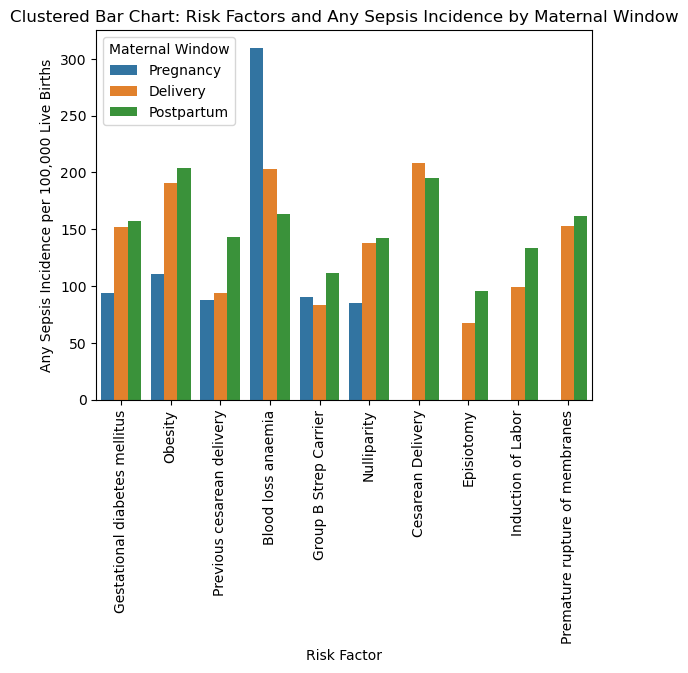

In [214]:


# Daten filtern für den Clustered Bar Chart
filtered_data = df_top_10[(df_top_10['Risk_Factor'].isin(list_risk)) & (df_top_10['Maternal_Window'].isin(['Pregnancy', 'Delivery', 'Postpartum']))]

# Clustered Bar Chart erstellen
sns.barplot(data=filtered_data, x='Risk_Factor', y='Any_Sepsis_Incidence_per_100000_Live_Births', hue='Maternal_Window')
plt.xlabel('Risk Factor')
plt.ylabel('Any Sepsis Incidence per 100,000 Live Births')
plt.title('Clustered Bar Chart: Risk Factors and Any Sepsis Incidence by Maternal Window')
plt.xticks(rotation=90)
plt.legend(title='Maternal Window')


# Diagramm anzeigen
plt.show()


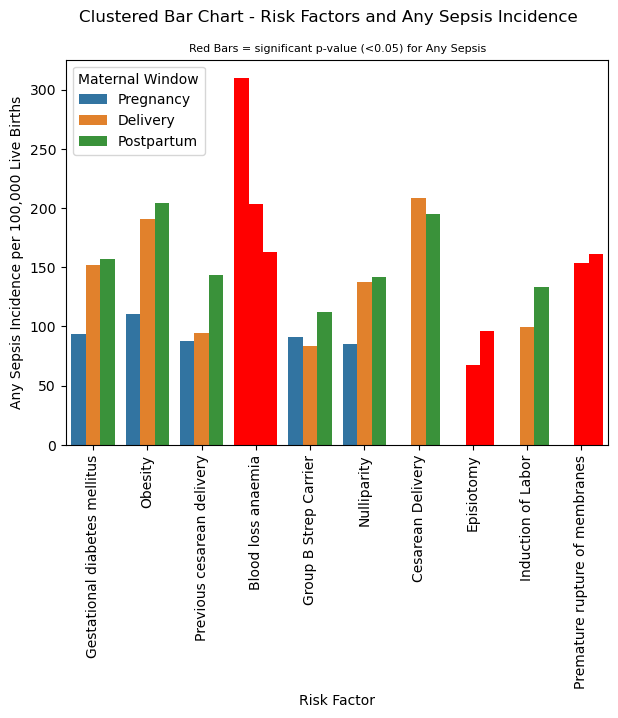

In [226]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daten filtern für den Clustered Bar Chart
filtered_data = df_top_10[(df_top_10['Risk_Factor'].isin(list_risk)) & (df_top_10['Maternal_Window'].isin(['Pregnancy', 'Delivery', 'Postpartum']))]

# Clustered Bar Chart erstellen
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=filtered_data, x='Risk_Factor', y='Any_Sepsis_Incidence_per_100000_Live_Births', hue='Maternal_Window')
plt.xlabel('Risk Factor')
plt.ylabel('Any Sepsis Incidence per 100,000 Live Births')
plt.suptitle('Clustered Bar Chart - Risk Factors and Any Sepsis Incidence')
plt.title('Red Bars = significant p-value (<0.05) for Any Sepsis', fontsize=8)
plt.xticks(rotation=90)

# Balken markieren
for bar in ax.containers:
    for i in range(len(bar.patches)):
        if filtered_data['Severe_Sepsis_p-value'].iloc[i] < 0.05:
            bar.patches[i].set_facecolor('red')

plt.legend(title='Maternal Window')
plt.show()


In [206]:
#check if the top 10 risk factors have a significant p-value for severe sepsis
list_risk = top_10_risk_factors['Risk_Factor'].tolist()
df_top_10  = risk_yes[risk_yes['Risk_Factor'].isin(list_risk)]
df_top_10_sev = df_top_10[df_top_10['Severe_Sepsis_p-value'] < 0.05]
df_top_10_sev

,Years_of_Live_Birth,Maternal_Window,Data_Source,Risk_Factor_Type,Risk_Factor,Risk_Factor_Strata,Live_Births_N,Live_Births_%,Any_Sepsis_Incidence_N,Any_Sepsis_Incidence_per_100000_Live_Births,Any_Sepsis_Crude_Odds_Ratio_95%_CI,Any_Sepsis_p-value,Severe_Sepsis_Incidence_N,Severe_Sepsis_Incidence_per_100000_Live_Births,Severe_Sepsis_Crude_Odds_Ratio_95%_CI,Severe_Sepsis_p-value
49,2016-2018,Pregnancy,SPARCS,Elixhauser Comorbidities,Blood loss anaemia,Yes,77802,12.16,241,309.76,5.90 (4.98-6.99),0.0001,72,92.54,9.83 (6.89-14.01),0.0001
176,2016-2018,Delivery,SPARCS,Bateman Comorbidities,Obesity,Yes,90289,14.11,172,190.50,2.11 (1.77-2.50),0.0001,29,32.12,1.68 (1.11-2.54),0.0132
196,2016-2018,Delivery,SPARCS,Elixhauser Comorbidities,Blood loss anaemia,Yes,77802,12.16,158,203.08,2.23 (1.87-2.67),0.0001,36,46.27,2.66 (1.81-3.89),0.0001
307,2016-2018,Delivery,SPARCS & Birth certificate,Obstetric,Cesarean Delivery,Yes,209421,33.82,437,208.67,4.51 (3.80-5.34),0.0001,86,41.07,4.67 (3.17-6.90),0.0001
316,2016-2018,Delivery,SPARCS & Birth certificate,Obstetric,Episiotomy,Yes,53120,8.58,36,67.77,0.65 (0.46-0.91),0.0118,3,5.65,0.27 (0.09-0.84),0.0245
322,2016-2018,Delivery,Birth certificate,Obstetric,Induction of Labor,Yes,243920,39.40,242,99.21,0.97 (0.82-1.14),0.6828,29,11.89,0.48 (0.32-0.73),0.0006
385,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Gestational diabetes mellitus,Yes,56628,8.85,89,157.17,1.37 (1.10-1.71),0.0052,17,30.02,1.68 (1.01-2.81),0.0463
395,2016-2018,Postpartum,SPARCS,Bateman Comorbidities,Obesity,Yes,90289,14.11,184,203.79,1.95 (1.65-2.31),0.0001,30,33.23,2.01 (1.33-3.03),0.0009
526,2016-2018,Postpartum,SPARCS & Birth certificate,Obstetric,Cesarean Delivery,Yes,209421,33.82,409,195.30,2.30 (1.99-2.66),0.0001,52,24.83,1.47 (1.03-2.11),0.0346
541,2016-2018,Postpartum,Birth certificate,Obstetric,Induction of Labor,Yes,243920,39.40,325,133.24,1.16 (1.00-1.34),0.0465,59,24.19,1.46 (1.03-2.09),0.0360


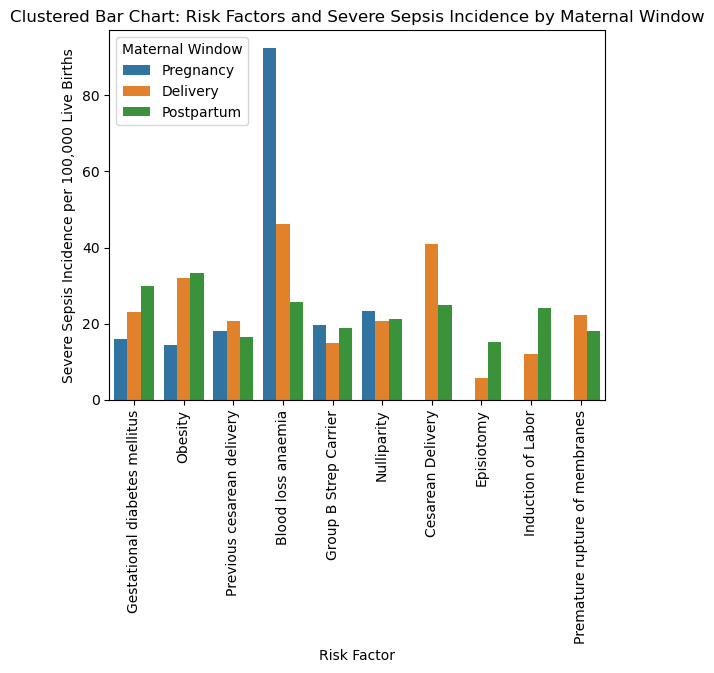

In [218]:


# Daten filtern für den Clustered Bar Chart
filtered_data = df_top_10[(df_top_10['Risk_Factor'].isin(list_risk)) & (df_top_10['Maternal_Window'].isin(['Pregnancy', 'Delivery', 'Postpartum']))]

# Clustered Bar Chart erstellen
sns.barplot(data=filtered_data, x='Risk_Factor', y='Severe_Sepsis_Incidence_per_100000_Live_Births', hue='Maternal_Window')
plt.xlabel('Risk Factor')
plt.ylabel('Severe Sepsis Incidence per 100,000 Live Births')
plt.title('Clustered Bar Chart: Risk Factors and Severe Sepsis Incidence by Maternal Window')
plt.xticks(rotation=90)
plt.legend(title='Maternal Window')


# Diagramm anzeigen
plt.show()


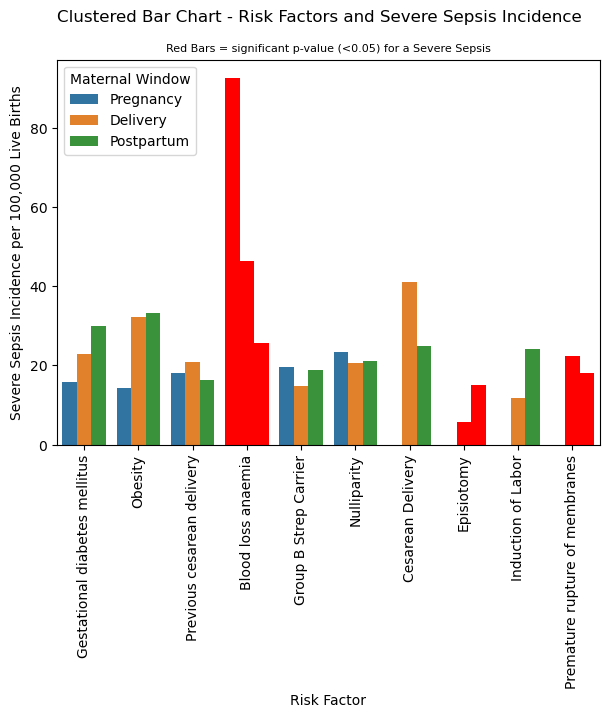

In [225]:
import matplotlib.pyplot as plt
import seaborn as sns

# Daten filtern für den Clustered Bar Chart
filtered_data = df_top_10[(df_top_10['Risk_Factor'].isin(list_risk)) & (df_top_10['Maternal_Window'].isin(['Pregnancy', 'Delivery', 'Postpartum']))]

# Clustered Bar Chart erstellen
plt.figure(figsize=(7, 5))
ax = sns.barplot(data=filtered_data, x='Risk_Factor', y='Severe_Sepsis_Incidence_per_100000_Live_Births', hue='Maternal_Window')
plt.xlabel('Risk Factor')
plt.ylabel('Severe Sepsis Incidence per 100,000 Live Births')
plt.suptitle('Clustered Bar Chart - Risk Factors and Severe Sepsis Incidence')
plt.title('Red Bars = significant p-value (<0.05) for a Severe Sepsis', fontsize=8)
plt.xticks(rotation=90)

# Balken markieren
for bar in ax.containers:
    for i in range(len(bar.patches)):
        if filtered_data['Severe_Sepsis_p-value'].iloc[i] < 0.05:
            bar.patches[i].set_facecolor('red')

plt.legend(title='Maternal Window')
plt.show()


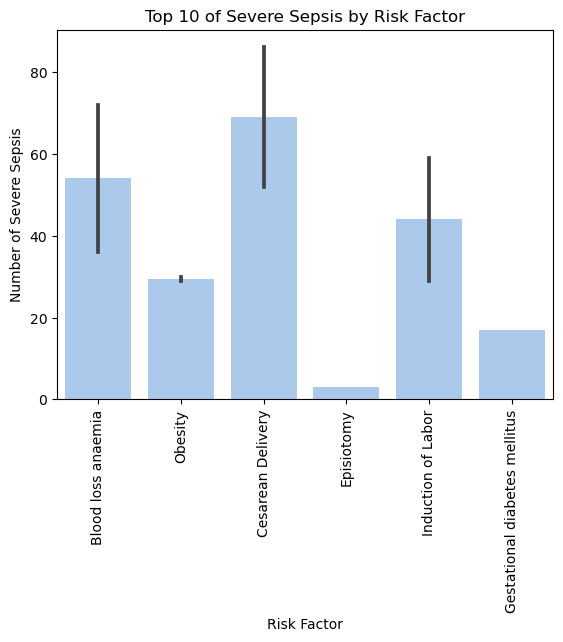

In [209]:
# Balkendiagramm erstellen
sns.barplot(data=df_top_10_sev, x='Risk_Factor', y='Severe_Sepsis_Incidence_N', color = base_color)
plt.xlabel('Risk Factor')
plt.ylabel('Number of Severe Sepsis')
plt.title('Top 10 of Severe Sepsis by Risk Factor')
plt.xticks(rotation=90)

plt.show()

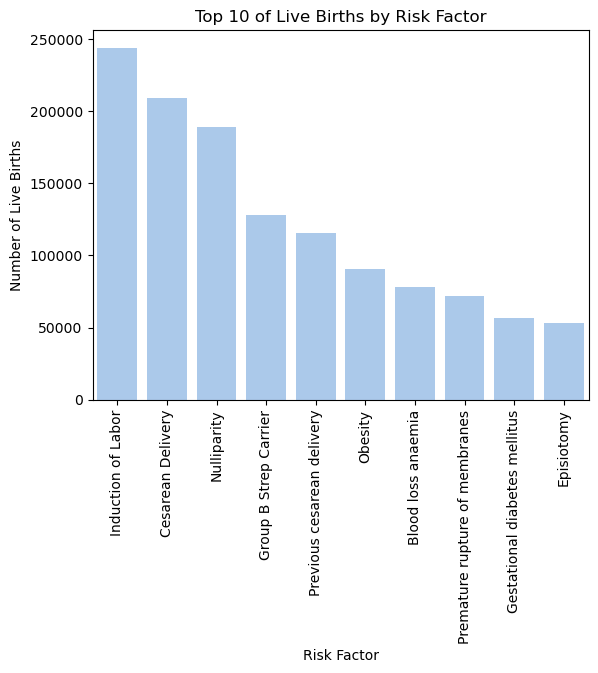

In [149]:

# DataFrame mit den Top 10 Live_Births_N nach Risikofaktoren
top_10_risk_factors = risk_yes_sum.sort_values(by='Live_Births_N', ascending=False).head(10)

# Balkendiagramm erstellen
sns.barplot(data=top_10_risk_factors, x='Risk_Factor', y='Live_Births_N', color = base_color)
plt.xlabel('Risk Factor')
plt.ylabel('Number of Live Births')
plt.title('Top 10 of Live Births by Risk Factor')
plt.xticks(rotation=90)

plt.show()


These are the ten most often risk factors that had been discovered in this study.

### Top ten risk factors with a significant risk of a sepsis

a) any sepsis

b) severe sepsis

In [196]:
#Any Sepsis

risk_factors = set(risk_yes['Risk_Factor'].tolist())
sum_data = []

for risk in risk_factors:
    risk_yes_filtered = risk_yes[(risk_yes['Risk_Factor'] == risk) 
                                 & (risk_yes['Maternal_Window'] == 'Delivery')
                                 & (risk_yes['Any_Sepsis_p-value'] < 0.05)]
    risk_yes_sum = risk_yes_filtered['Live_Births_N'].sum()
    sum_data.append({'Risk_Factor': risk, 'Live_Births_N': risk_yes_sum})

risk_yes_sum_sig_any = pd.DataFrame(sum_data)

top_10_risk_factors_any = risk_yes_sum_sig_any.sort_values(by='Live_Births_N', ascending=False).head(10)
top_10_risk_factors_any = top_10_risk_factors_any.reset_index(drop=True)
top_10_risk_factors_any


,Risk_Factor,Live_Births_N
0,Cesarean Delivery,209421
1,Nulliparity,188819
2,Group B Strep Carrier,127776
3,Obesity,90289
4,Blood loss anaemia,77802
5,Premature rupture of membranes,71846
6,Gestational diabetes mellitus,56628
7,Episiotomy,53120
8,Deficiency anaemia,49184
9,Chronic pulmonary disease,44414


In [151]:
list_any = top_10_risk_factors_any['Risk_Factor'].tolist()
list_any

['Cesarean Delivery',
 'Nulliparity',
 'Group B Strep Carrier',
 'Obesity',
 'Blood loss anaemia',
 'Premature rupture of membranes',
 'Gestational diabetes mellitus',
 'Episiotomy',
 'Deficiency anaemia',
 'Chronic pulmonary disease']

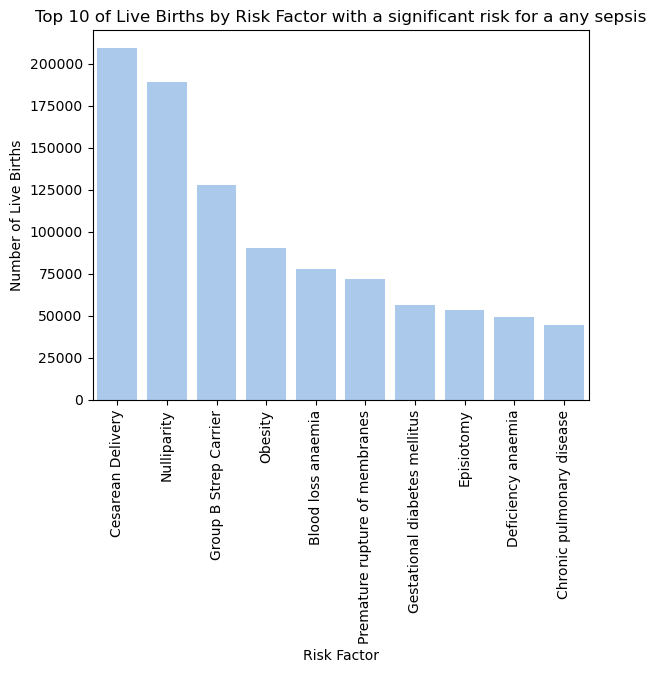

In [152]:

# Balkendiagramm erstellen
sns.barplot(data=top_10_risk_factors_any, x='Risk_Factor', y='Live_Births_N', color = base_color)
plt.xlabel('Risk Factor')
plt.ylabel('Number of Live Births')
plt.title('Top 10 of Live Births by Risk Factor with a significant risk for a any sepsis')
plt.xticks(rotation=90)

plt.show()


In [153]:
#Severe Sepsis

risk_factors = set(risk_yes['Risk_Factor'].tolist())
sum_data = []

for risk in risk_factors:
    risk_yes_filtered = risk_yes[(risk_yes['Risk_Factor'] == risk) 
                                 & (risk_yes['Maternal_Window'] == 'Delivery')
                                 & (risk_yes['Severe_Sepsis_p-value'] < 0.05)]
    risk_yes_sum = risk_yes_filtered['Live_Births_N'].sum()
    sum_data.append({'Risk_Factor': risk, 'Live_Births_N': risk_yes_sum})

risk_yes_sum_sig_sev = pd.DataFrame(sum_data)

top_10_risk_factors_sev = risk_yes_sum_sig_sev.sort_values(by='Live_Births_N', ascending=False).head(10)
top_10_risk_factors_sev = top_10_risk_factors_sev.reset_index(drop=True)
top_10_risk_factors_sev


,Risk_Factor,Live_Births_N
0,Induction of Labor,243920
1,Cesarean Delivery,209421
2,Obesity,90289
3,Blood loss anaemia,77802
4,Episiotomy,53120
5,Deficiency anaemia,49184
6,Chronic pulmonary disease,44414
7,Asthma,43651
8,Tobacco use,31756
9,Preterm Delivery,27830


In [154]:
list_sev = top_10_risk_factors_sev['Risk_Factor'].tolist()
list_sev

['Induction of Labor',
 'Cesarean Delivery',
 'Obesity',
 'Blood loss anaemia',
 'Episiotomy',
 'Deficiency anaemia',
 'Chronic pulmonary disease',
 'Asthma',
 'Tobacco use',
 'Preterm Delivery']

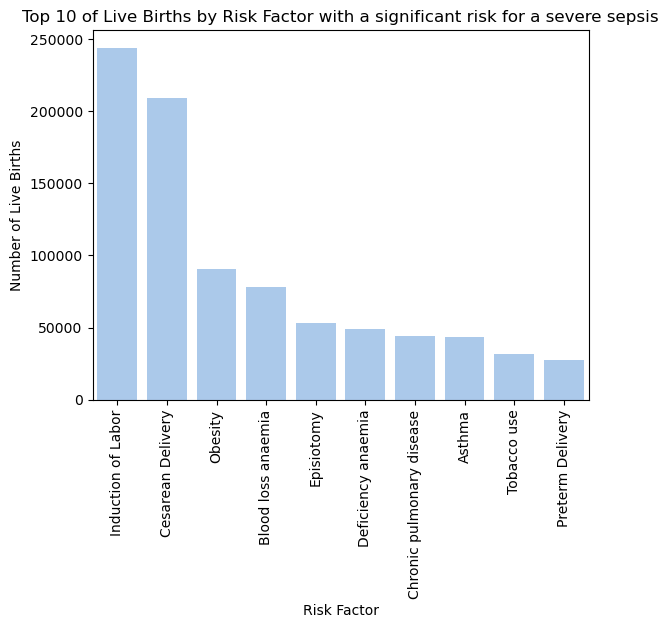

In [155]:

# Balkendiagramm erstellen
sns.barplot(data=top_10_risk_factors_sev, x='Risk_Factor', y='Live_Births_N', color = base_color)
plt.xlabel('Risk Factor')
plt.ylabel('Number of Live Births')
plt.title('Top 10 of Live Births by Risk Factor with a significant risk for a severe sepsis')
plt.xticks(rotation=90)

plt.show()


In [156]:
#Top 10 risk factors overall and with any sepsis and with severe sepsis in combination

common_risks = set(list_risk).intersection(list_any).intersection(list_sev)

print(common_risks)

{'Cesarean Delivery', 'Obesity', 'Episiotomy', 'Blood loss anaemia'}


## Results

### Question: 

What are the 10 most risk factors in the dataset?

'Induction of Labor',
 'Cesarean Delivery',
 'Nulliparity',
 'Group B Strep Carrier',
 'Previous cesarean delivery',
 'Obesity',
 'Blood loss anaemia',
 'Premature rupture of membranes',
 'Gestational diabetes mellitus',
 'Episiotomy'


### Question: 

What are the 10 most risk factors to get a sepsis during the maternal window?

a) any sepsis

'Cesarean Delivery',
 'Nulliparity',
 'Group B Strep Carrier',
 'Obesity',
 'Blood loss anaemia',
 'Premature rupture of membranes',
 'Gestational diabetes mellitus',
 'Episiotomy',
 'Deficiency anaemia',
 'Chronic pulmonary disease'


b) severe sepsis

'Induction of Labor',
 'Cesarean Delivery',
 'Obesity',
 'Blood loss anaemia',
 'Episiotomy',
 'Deficiency anaemia',
 'Chronic pulmonary disease',
 'Asthma',
 'Tobacco use',
 'Preterm Delivery'
 
 
### Question: 

Which risk factors are most often overall and have a significant risk for any or a severe sepsis?

'Cesarean Delivery', 'Obesity', 'Episiotomy', 'Blood loss anaemia'

### Function for the top 10

In [157]:
#ohne summen

def get_top_10_risk_factors(dataframe, maternal_window='Delivery', p_value_column=None):
    risk_factors = set(dataframe['Risk_Factor'].tolist())
    risk_data = []

    for risk in risk_factors:
        if p_value_column is not None:
            risk_filtered = dataframe[(dataframe['Risk_Factor'] == risk) 
                                      & (dataframe['Maternal_Window'] == maternal_window)
                                      & (dataframe[p_value_column] < 0.05)]
        else:
            risk_filtered = dataframe[(dataframe['Risk_Factor'] == risk) 
                                      & (dataframe['Maternal_Window'] == maternal_window)]
            
        risk_values = risk_filtered['Live_Births_N'].tolist()
        if len(risk_values) > 0:
            risk_data.append({'Risk_Factor': risk, 'Live_Births_N': risk_values[0]})
        else:
            risk_data.append({'Risk_Factor': risk, 'Live_Births_N': None})

    risk_df = pd.DataFrame(risk_data)
    top_10_risk_factors = risk_df.sort_values(by='Live_Births_N', ascending=False).head(10)
    top_10_risk_factors = top_10_risk_factors.reset_index(drop=True)
    
    return top_10_risk_factors



In [158]:
#Dataframe with the number of live births of the top 10 risk factors
#for every maternal window and a significant p-value for any sepsis
any_pregnancy = get_top_10_risk_factors(risk_yes, maternal_window='Pregnancy', p_value_column='Any_Sepsis_p-value')
any_delivery = get_top_10_risk_factors(risk_yes, maternal_window='Delivery', p_value_column='Any_Sepsis_p-value')
any_postpartum = get_top_10_risk_factors(risk_yes, maternal_window='Postpartum', p_value_column='Any_Sepsis_p-value')

# DataFrame zusammenführen
merged_df_any = pd.merge(any_pregnancy[['Risk_Factor', 'Live_Births_N']], any_delivery[['Risk_Factor', 'Live_Births_N']], on='Risk_Factor', how='outer')
merged_df_any = pd.merge(merged_df_any, any_postpartum[['Risk_Factor', 'Live_Births_N']], on='Risk_Factor', how='outer')

# Spalten umbenennen
merged_df_any.columns = ['Risk_Factor Any Sepsis', 'Pregnancy', 'Delivery', 'Postpartum']

merged_df_any



,Risk_Factor Any Sepsis,Pregnancy,Delivery,Postpartum
0,Obesity,90289.0,90289.0,90289.0
1,Blood loss anaemia,77802.0,77802.0,77802.0
2,Deficiency anaemia,49184.0,49184.0,49184.0
3,Chronic pulmonary disease,44414.0,44414.0,44414.0
4,Asthma,43651.0,NaN,NaN
5,Tobacco use,31756.0,NaN,NaN
6,Coagulopathy,23430.0,NaN,NaN
7,Depression,22091.0,NaN,NaN
8,Preexisting hypertension,20870.0,NaN,NaN
9,Drug abuse,15146.0,NaN,NaN


In [159]:
#Dataframe with the number of live births of the top 10 risk factors
#for every maternal window and a significant p-value for severe sepsis
sev_pregnancy = get_top_10_risk_factors(risk_yes, maternal_window='Pregnancy', p_value_column='Severe_Sepsis_p-value')
sev_delivery = get_top_10_risk_factors(risk_yes, maternal_window='Delivery', p_value_column='Severe_Sepsis_p-value')
sev_postpartum = get_top_10_risk_factors(risk_yes, maternal_window='Postpartum', p_value_column='Severe_Sepsis_p-value')

# DataFrame zusammenführen
merged_df_sev = pd.merge(sev_pregnancy[['Risk_Factor', 'Live_Births_N']], sev_delivery[['Risk_Factor', 'Live_Births_N']], on='Risk_Factor', how='outer')
merged_df_sev = pd.merge(merged_df_sev, sev_postpartum[['Risk_Factor', 'Live_Births_N']], on='Risk_Factor', how='outer')

# Spalten umbenennen
merged_df_sev.columns = ['Risk_Factor Severe Sepsis', 'Pregnancy', 'Delivery', 'Postpartum']

merged_df_sev



,Risk_Factor Severe Sepsis,Pregnancy,Delivery,Postpartum
0,Blood loss anaemia,77802.0,77802.0,NaN
1,Deficiency anaemia,49184.0,49184.0,NaN
2,Chronic pulmonary disease,44414.0,44414.0,NaN
3,Asthma,43651.0,43651.0,NaN
4,Coagulopathy,23430.0,NaN,23430.0
5,Depression,22091.0,NaN,NaN
6,Severe preeclampsia/eclampsia,13915.0,NaN,NaN
7,Multiple gestation,12603.0,NaN,NaN
8,Fluid and electrolyte disorders,11270.0,NaN,NaN
9,Sickle cell disease,10948.0,NaN,NaN


In [160]:
#Funktion, die Dataframes und Balkendiagramme zurückgibt

def get_top_10_risk_factors_plot(dataframe, maternal_window='Delivery', p_value_column=None):
    risk_factors = set(dataframe['Risk_Factor'].tolist())
    risk_data = []

    for risk in risk_factors:
        if p_value_column is not None:
            risk_filtered = dataframe[(dataframe['Risk_Factor'] == risk) 
                                      & (dataframe['Maternal_Window'] == maternal_window)
                                      & (dataframe[p_value_column] < 0.05)]
        else:
            risk_filtered = dataframe[(dataframe['Risk_Factor'] == risk) 
                                      & (dataframe['Maternal_Window'] == maternal_window)]
            
        risk_values = risk_filtered['Live_Births_N'].tolist()
        if len(risk_values) > 0:
            risk_data.append({'Risk_Factor': risk, 'Live_Births_N': risk_values[0]})
        else:
            risk_data.append({'Risk_Factor': risk, 'Live_Births_N': None})
    
    # Plot Balkendiagramm
    sns.barplot(data=top_10_risk_factors, x='Risk_Factor', y='Live_Births_N', color = base_color)
    plt.xlabel('Risk Factor')
    plt.ylabel('Number of Live Births')
    plt.title(f'Top 10 of Live Births by Risk Factor ({maternal_window} & significant {p_value_column})')
    plt.xticks(rotation=90)
    
    # DataFrame anzeigen
    print(top_10_risk_factors)
    
    # DataFrame zurückgeben
    return top_10_risk_factors


                       Risk_Factor  Live_Births_N
75              Induction of Labor         243920
4                Cesarean Delivery         209421
7                      Nulliparity         188819
36           Group B Strep Carrier         127776
76      Previous cesarean delivery         115630
72                         Obesity          90289
61              Blood loss anaemia          77802
0   Premature rupture of membranes          71846
54   Gestational diabetes mellitus          56628
80                      Episiotomy          53120


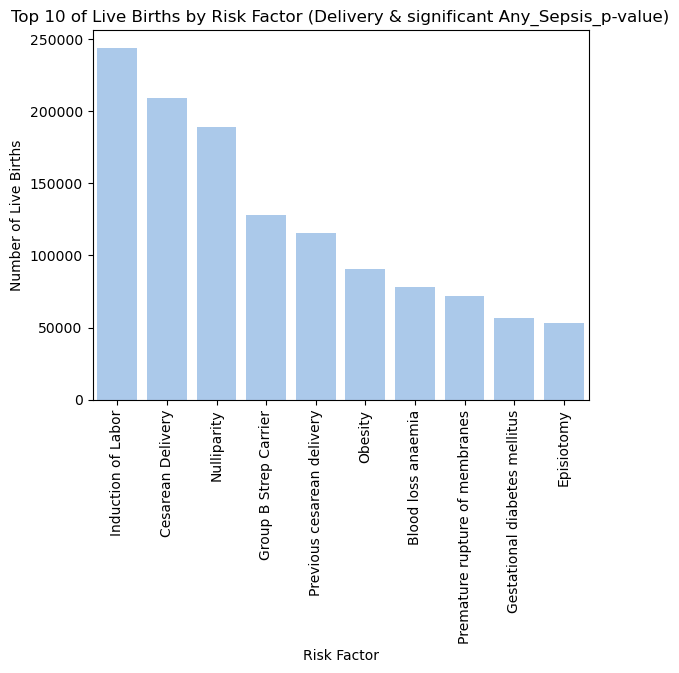

In [161]:
# Beispiel für 'Any_Sepsis_p-value'
top_10_any_sepsis = get_top_10_risk_factors_plot(risk_yes, maternal_window='Delivery', p_value_column='Any_Sepsis_p-value')



In [174]:
#Function to create a dataframe with the Incidence for a sepsis

def get_top_10_sepsis_incidence(dataframe, 
                                maternal_window='Delivery', 
                                p_value_column=None, 
                                sepsis_incidence = 'Any_Sepsis_Incidence_per_100000_Live_Births'):
    
    risk_factors = set(dataframe['Risk_Factor'].tolist())
    risk_data = []

    for risk in risk_factors:
        if p_value_column is not None:
            risk_filtered = dataframe[(dataframe['Risk_Factor'] == risk) 
                                      & (dataframe['Maternal_Window'] == maternal_window)
                                      & (dataframe[p_value_column] < 0.05)]
        else:
            risk_filtered = dataframe[(dataframe['Risk_Factor'] == risk) 
                                      & (dataframe['Maternal_Window'] == maternal_window)]
            
        risk_values = risk_filtered[sepsis_incidence].tolist()
        if len(risk_values) > 0:
            risk_data.append({'Risk_Factor': risk, sepsis_incidence: risk_values[0]})
        else:
            risk_data.append({'Risk_Factor': risk, sepsis_incidence: None})

    risk_df = pd.DataFrame(risk_data)
    top_10_risk_factors = risk_df.sort_values(by=sepsis_incidence, ascending=False).head(10)
    top_10_risk_factors = top_10_risk_factors.reset_index(drop=True)
    
    return top_10_risk_factors



In [184]:
# Beispiel für 'Any_Sepsis_p-value'
top_10_any_sepsis = get_top_10_sepsis_incidence(risk_yes, 
                                maternal_window='Postpartum', 
                                p_value_column='Any_Sepsis_p-value', 
                                sepsis_incidence = 'Any_Sepsis_Incidence_per_100000_Live_Births')

top_10_any_sepsis

,Risk_Factor,Any_Sepsis_Incidence_per_100000_Live_Births
0,Acute myocardial infarction,5555.56
1,Ventilation,2816.90
2,Temporary tracheostomy,2808.99
3,Puerperal cerebrovascular disorders,2325.58
4,Pulmonary edema / Acute heart failure,2105.26
5,Hysterectomy,1859.80
6,Acute renal failure,1771.65
7,Adult respiratory distress syndrome,1699.72
8,Conversion of cardiac rhythm,1587.30
9,Shock,1534.53


In [181]:
# Beispiel für 'Severe_Sepsis_p-value'
top_10_sev_sepsis = get_top_10_sepsis_incidence(risk_yes, 
                                maternal_window='Delivery', 
                                p_value_column='Severe_Sepsis_p-value', 
                                sepsis_incidence = 'Severe_Sepsis_Incidence_per_100000_Live_Births')

top_10_sev_sepsis

,Risk_Factor,Severe_Sepsis_Incidence_per_100000_Live_Births
0,Acute myocardial infarction,16666.67
1,Ventilation,10985.92
2,Temporary tracheostomy,10955.06
3,Shock,10485.93
4,Adult respiratory distress syndrome,9348.44
5,Amniotic fluid embolism,9090.91
6,Cardiac arrest/ventricular fibrillation,7692.31
7,Puerperal cerebrovascular disorders,4651.16
8,Air and thrombotic embolism,4545.45
9,Acute renal failure,3937.01


## Scatterplots

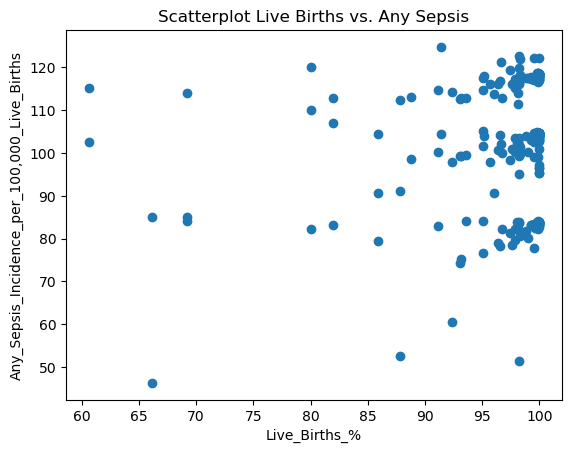

In [165]:
plt.scatter(data=risk_no, x='Live_Births_%', y='Any_Sepsis_Incidence_per_100000_Live_Births')
beschriftung_diagramm('Live_Births_%','Any_Sepsis_Incidence_per_100,000_Live_Births', 'Scatterplot Live Births vs. Any Sepsis')

## Filter for significant risk of a sepsis

In [ ]:
# Filtern des Dataframes für das gewünschte Risiko
df_risk = df[df['Risk_Factor'] == 'Gestational diabetes mellitus']

# Filtern der relevanten Spalten
df_risk = df_risk[['Risk_Factor', 'Maternal_Window','Any_Sepsis_Incidence_per_100,000_Live_Births', 'Any_Sepsis_p-value', ]]

# Entfernen von Zeilen mit fehlenden Werten
df_risk = df_risk.dropna()

# Definieren eines Schwellenwerts für die Signifikanz
significance_threshold = 0.05

# Vorhersage der Sepsis-Wahrscheinlichkeit basierend auf dem p-Wert
df_risk['Sepsis_Prediction'] = df_risk['Any_Sepsis_p-value'] < significance_threshold

# Anzeigen des resultierenden Dataframes
df_risk
